In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [4]:
n_samples = 300
n_clusters = 4
random_state = 42

X, y_true = make_blobs(n_samples=n_samples,
                       centers= n_clusters, n_features=2,
                       cluster_std=1.0,
                       random_state= random_state)

df = pd.DataFrame({'feature1' : X[:,0], 'feature2' :X[:,1]})
print("first 5 rows of the generated data: ")

df.head()

first 5 rows of the generated data: 


,feature1,feature2
0,-9.297689,6.473679
1,-9.698741,6.938967
2,-1.686653,7.793442
3,-7.097308,-5.781333
4,-10.876452,6.315437


/tmp/ipython-input-22-829745241.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df, x='feature1', y='feature2', palette='bright', s=50)


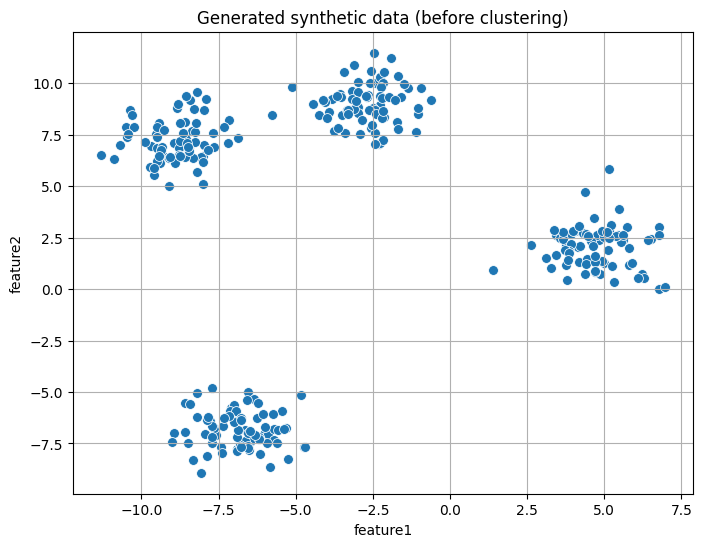

In [22]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='feature1', y='feature2', palette='bright', s=50)
plt.title('Generated synthetic data (before clustering)')
plt.grid(True)
plt.show()

In [6]:
model = KMeans(n_clusters=n_clusters, init='k-means++', n_init='auto', random_state = random_state)
model.fit(X)

KMeans(n_clusters=4, random_state=42)

In [10]:
y_kmeans = model.labels_
cluster_centers = model.cluster_centers_

df['cluster'] = y_kmeans

print(f"\n---first 5 rows of the data with cluster assignments ---")
df.head()




---first 5 rows of the data with cluster assignments ---


,feature1,feature2,cluster
0,-9.297689,6.473679,3
1,-9.698741,6.938967,3
2,-1.686653,7.793442,0
3,-7.097308,-5.781333,1
4,-10.876452,6.315437,3


In [11]:
print(f"\nCoordinates of cluster centers:\n{cluster_centers}")



Coordinates of cluster centers:
[[-2.70981136  8.97143336]
 [-6.83235205 -6.83045748]
 [ 4.7182049   2.04179676]
 [-8.87357218  7.17458342]]


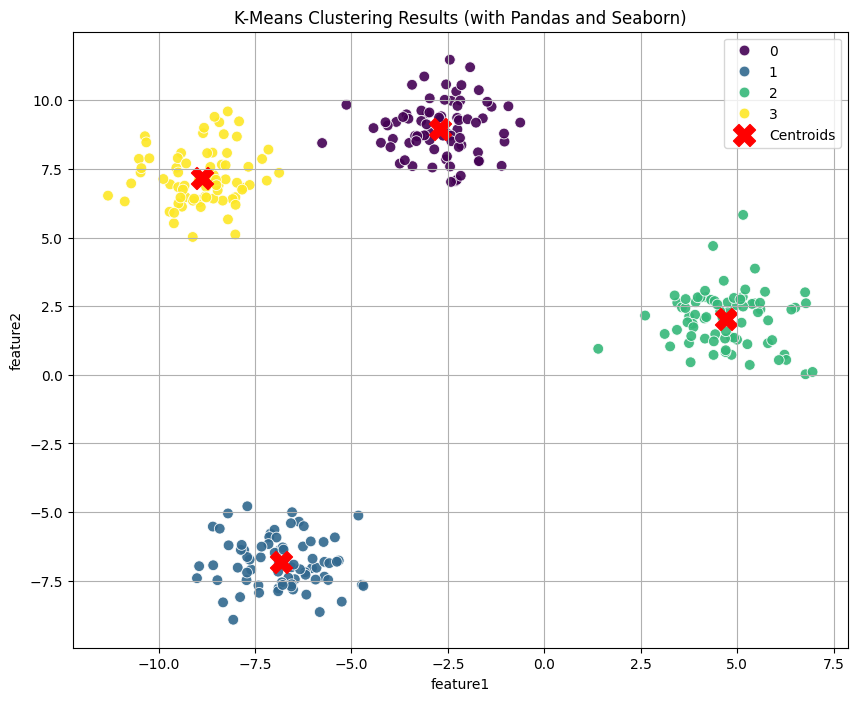

In [27]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='feature1', y='feature2', hue='cluster', palette='viridis', s=60, alpha=0.9, legend='full')
plt.scatter(x=cluster_centers[:, 0], y=cluster_centers[:, 1], c='red', s=250, marker='X', label='Centroids')

plt.title("K-Means Clustering Results (with Pandas and Seaborn)")
plt.legend()
plt.grid(True)
plt.show()


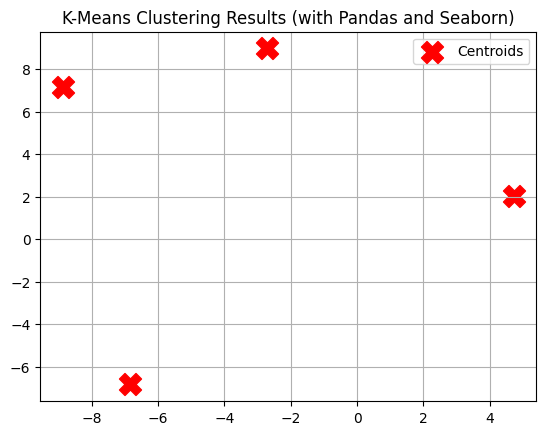